In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset
data_path = "data/rice_synthetic_data.csv"
df = pd.read_csv(data_path)
df.head()

,temperature_c,rainfall_cm_year,irrigation_available,soil_type,soil_ph,soil_water_retention,topography,sunlight_hours_day,humidity_percent,altitude_m,...,temp_variation_c,extreme_weather_events,growing_season_days,proximity_water_km,wind_speed_ms,pest_pressure,latitude_deg,harsh_condition_type,suitability,is_perfect_weather
0,30.481031,150.598655,0,Clay,4.873098,48.567102,Gently Sloping,6.048938,73.153718,111.415987,...,8.116657,0,102.880964,29.301963,1.249880,Moderate,33.040392,NaN,0,0
1,27.145681,167.118636,1,Sandy,5.918156,45.031634,Terraced,8.625092,84.873670,329.949996,...,4.456794,3,90.780467,20.091533,6.650592,Moderate,12.881810,Storm,0,0
2,31.582926,444.429436,1,Loam,7.182240,50.761314,Gently Sloping,7.142419,90.370295,408.581527,...,3.983688,0,124.734253,4.822809,1.366953,High,17.586505,Severe Flood,0,0
3,35.143268,208.937852,1,Loam,6.674001,27.095449,Gently Sloping,5.556998,64.239104,243.463787,...,2.000000,4,157.913500,10.765904,7.516451,Moderate,1.093806,Storm,0,0
4,26.501618,356.424201,1,Rocky,4.815601,27.903979,Gently Sloping,6.344502,79.246854,1149.817341,...,5.000565,0,121.572181,26.601504,0.995736,Moderate,2.366928,NaN,0,0


In [4]:
# Observe the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temperature_c           10000 non-null  float64
 1   rainfall_cm_year        10000 non-null  float64
 2   irrigation_available    10000 non-null  int64  
 3   soil_type               10000 non-null  object 
 4   soil_ph                 10000 non-null  float64
 5   soil_water_retention    10000 non-null  float64
 6   topography              10000 non-null  object 
 7   sunlight_hours_day      10000 non-null  float64
 8   humidity_percent        10000 non-null  float64
 9   altitude_m              10000 non-null  float64
 10  flooding_duration_days  10000 non-null  float64
 11  soil_nutrient_level     10000 non-null  object 
 12  drainage_capacity       10000 non-null  object 
 13  temp_variation_c        10000 non-null  float64
 14  extreme_weather_events  10000 non-null 

In [5]:
# Observe the data statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_c,10000.0,29.497439,6.522798,10.0,25.059565,28.806170,32.936047,45.000000
rainfall_cm_year,10000.0,229.622209,129.877135,50.0,128.361390,199.769130,312.866428,500.000000
irrigation_available,10000.0,0.495700,0.500007,0.0,0.000000,0.000000,1.000000,1.000000
soil_ph,10000.0,6.048023,1.150189,3.5,5.298195,6.016005,6.721723,10.000000
soil_water_retention,10000.0,38.600617,12.486619,10.0,30.341698,39.288397,47.802417,60.000000
sunlight_hours_day,10000.0,7.995778,1.936804,3.0,6.660573,8.023479,9.345281,12.000000
humidity_percent,10000.0,76.229545,16.033471,40.0,65.159394,77.725728,88.951315,100.000000
altitude_m,10000.0,402.455851,399.087835,0.0,118.701903,280.024381,565.986652,3217.986598
flooding_duration_days,10000.0,85.172743,29.040813,10.0,65.049608,83.088274,104.238134,150.000000
temp_variation_c,10000.0,5.654050,2.614994,2.0,3.529088,5.384605,7.421130,13.984101


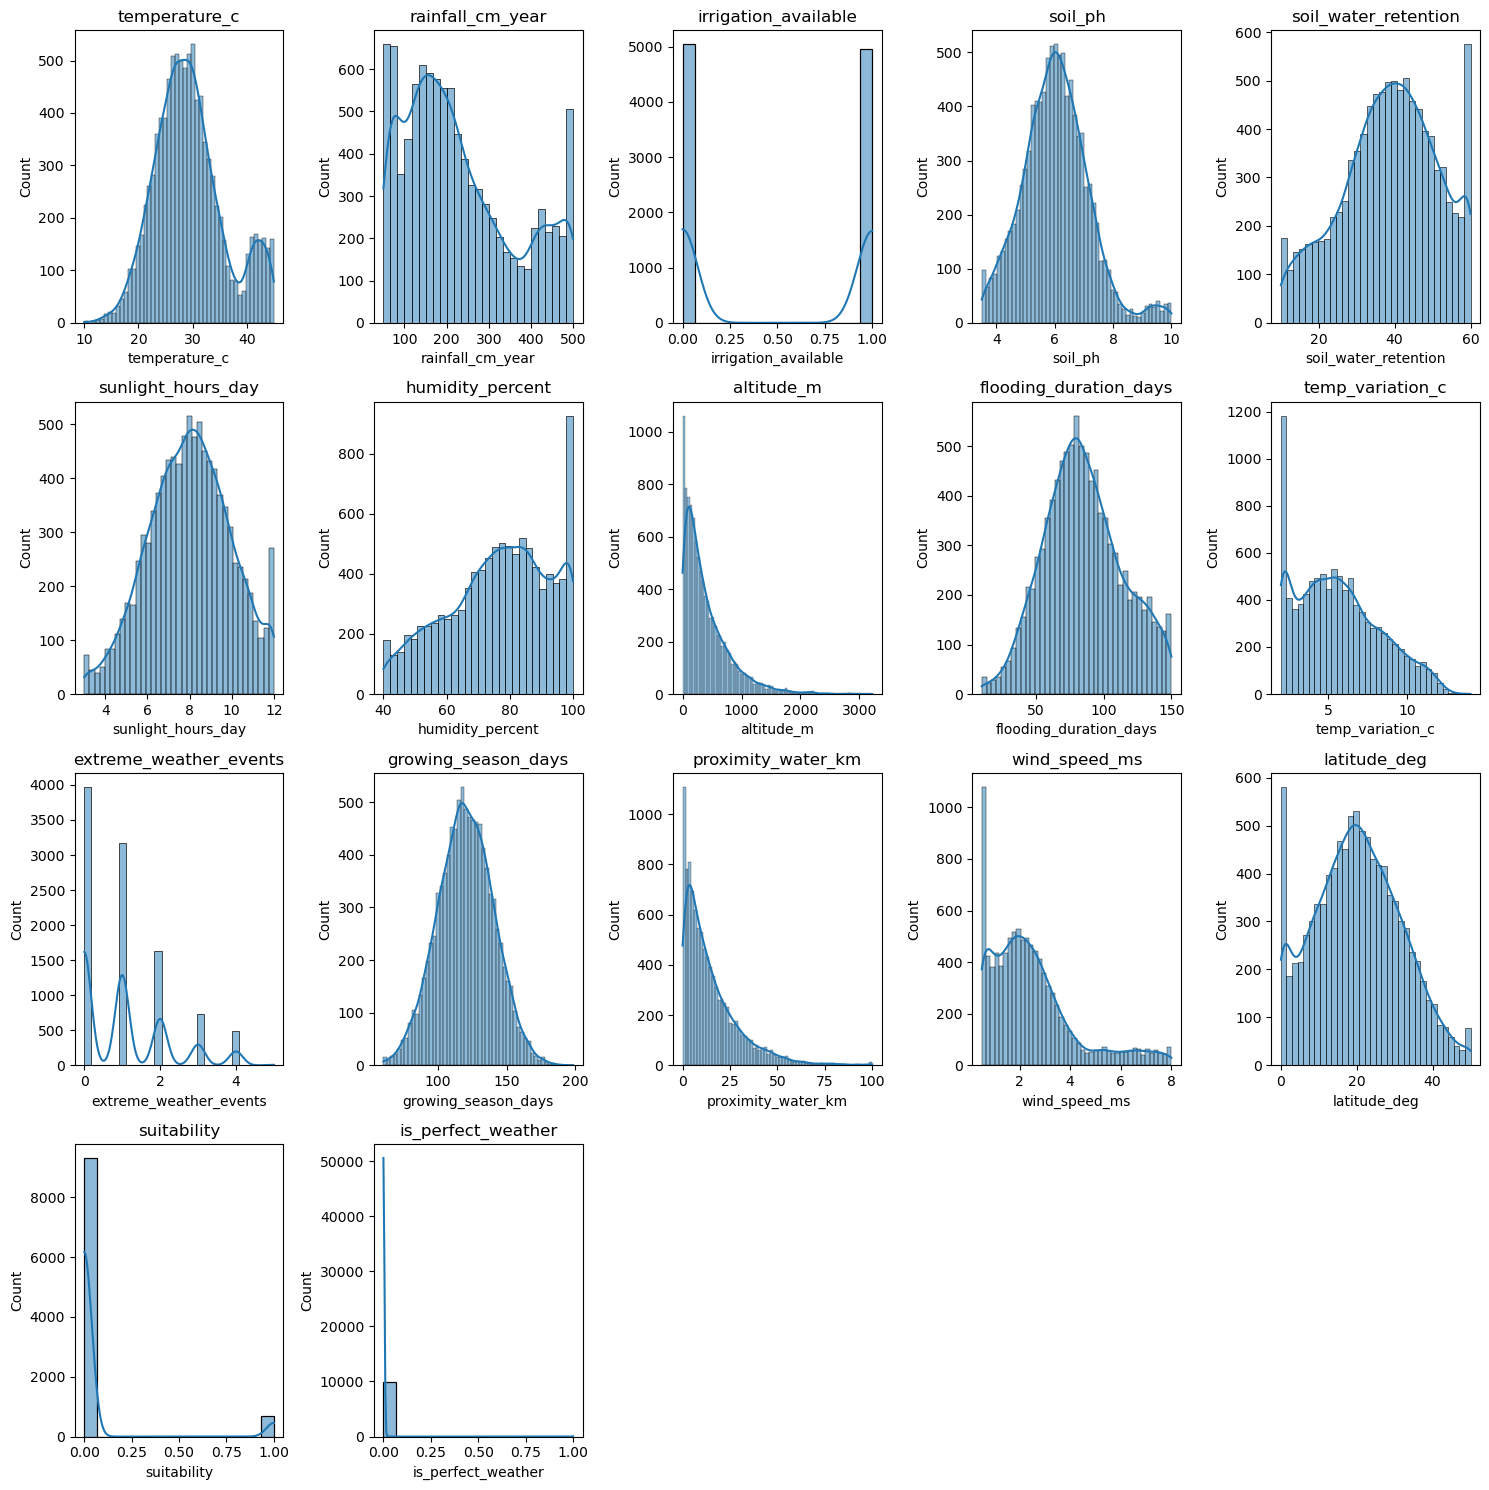

In [6]:
# Observe the data distribution
def plot_histogram(df):
    numerical_columns = df.select_dtypes(include='number').columns
    fig, axes = plt.subplots(int(np.ceil(len(numerical_columns) / 5)), 5, figsize=(15, 15))
    axes = axes.flatten()
    for i, column in enumerate(numerical_columns):
        sns.histplot(df[column], ax=axes[i], kde=True)
        axes[i].set_title(column)
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    plt.tight_layout()
    plt.show()

plot_histogram(df)

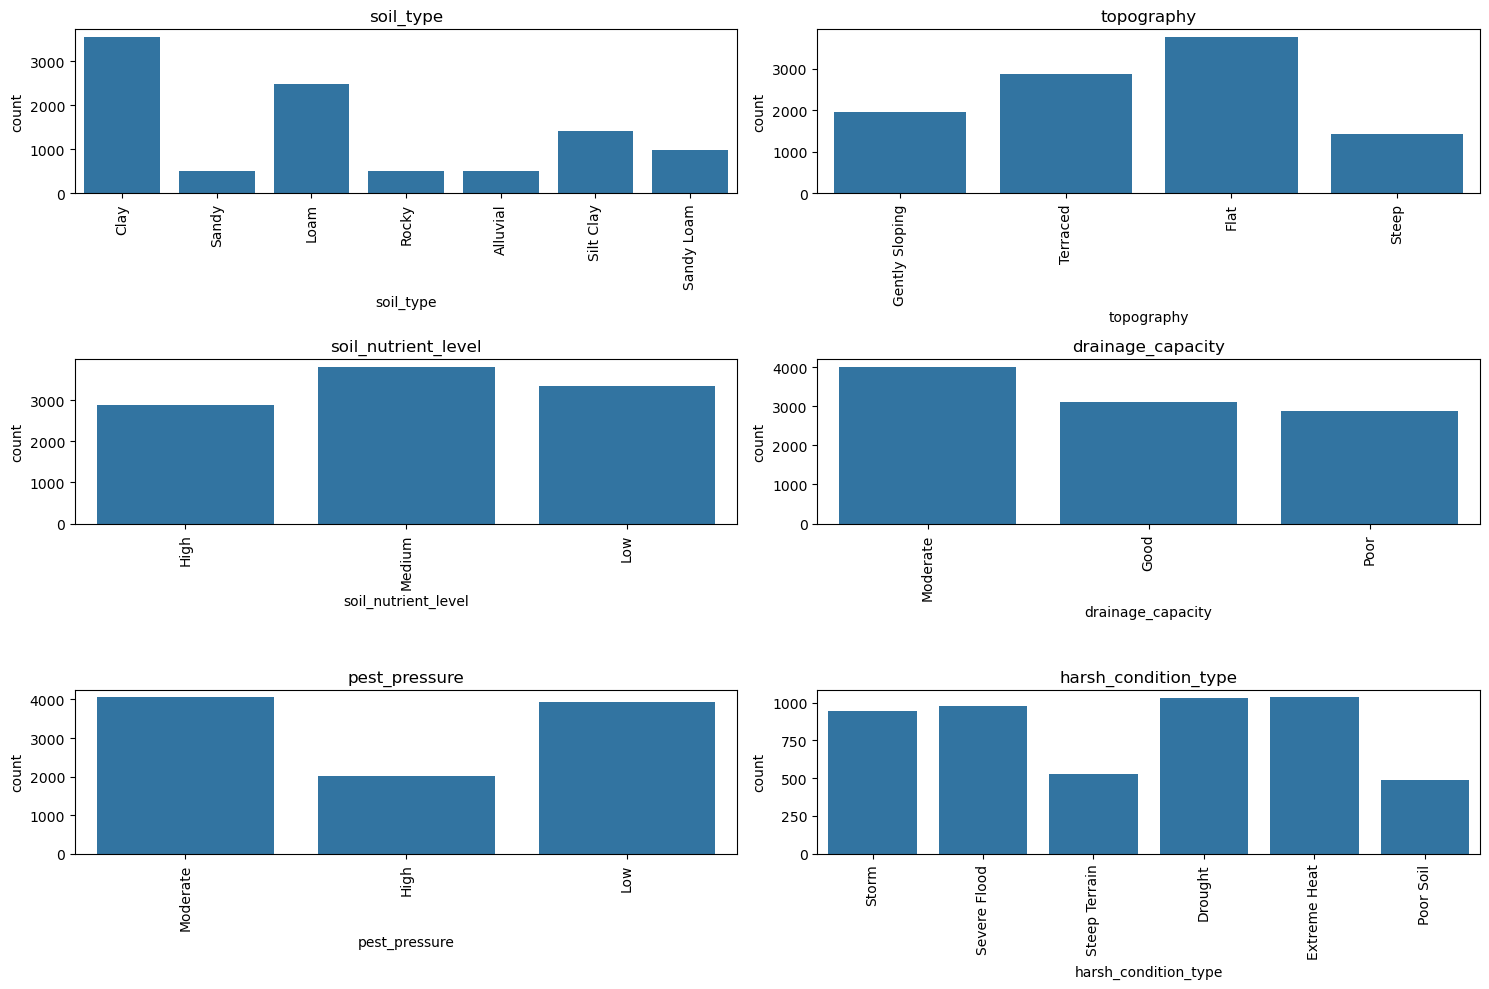

In [7]:
def plot_countplot(df):
    categorical_columns = df.select_dtypes(include='object').columns
    fig, axes = plt.subplots(int(np.ceil(len(categorical_columns) / 2)), 2, figsize=(15, 10))
    axes = axes.flatten()
    for i, column in enumerate(categorical_columns):
        sns.countplot(x=df[column], ax=axes[i])
        axes[i].set_title(column)
        axes[i].tick_params(axis='x', rotation=90)
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    plt.tight_layout()
    plt.show()

plot_countplot(df)

In [8]:
df = df.drop(columns=['is_perfect_weather'], axis=1)

In [9]:

# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
if not missing_values.empty:
    print("Missing values found in the following columns:")
    print(missing_values)
else:
    print("No missing values found in the dataset.")

Missing values found in the following columns:
harsh_condition_type    4991
dtype: int64


In [10]:
# Check for duplicates
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Duplicate rows found: {duplicates}")
else:
    print("No duplicate rows found in the dataset.")

No duplicate rows found in the dataset.


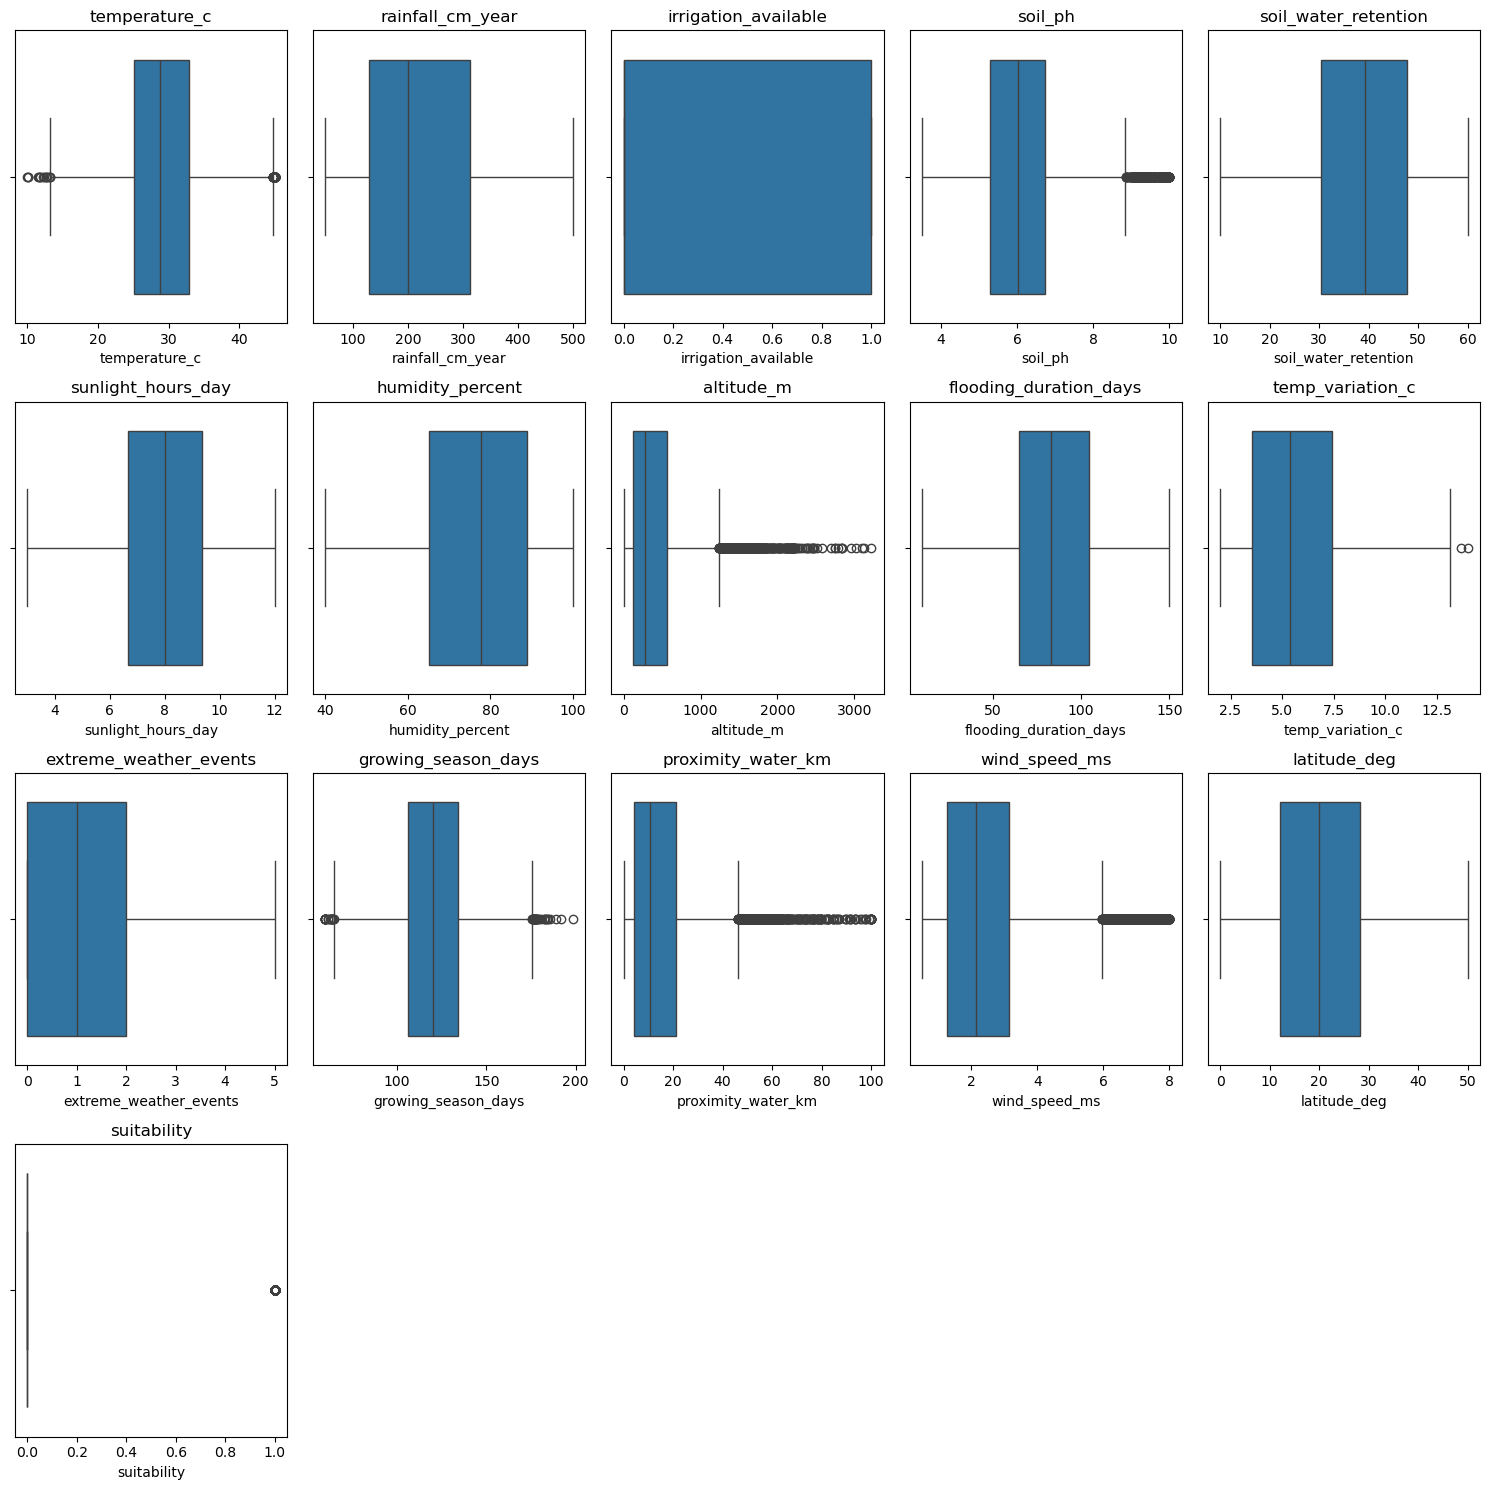

In [11]:
# Check for outliers and visualize them
def plot_boxplot(df):
    numerical_columns = df.select_dtypes(include='number').columns
    fig, axes = plt.subplots(int(np.ceil(len(numerical_columns) / 5)), 5, figsize=(15, 15))
    axes = axes.flatten()
    for i, column in enumerate(numerical_columns):
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(column)
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    plt.tight_layout()
    plt.show()

plot_boxplot(df)

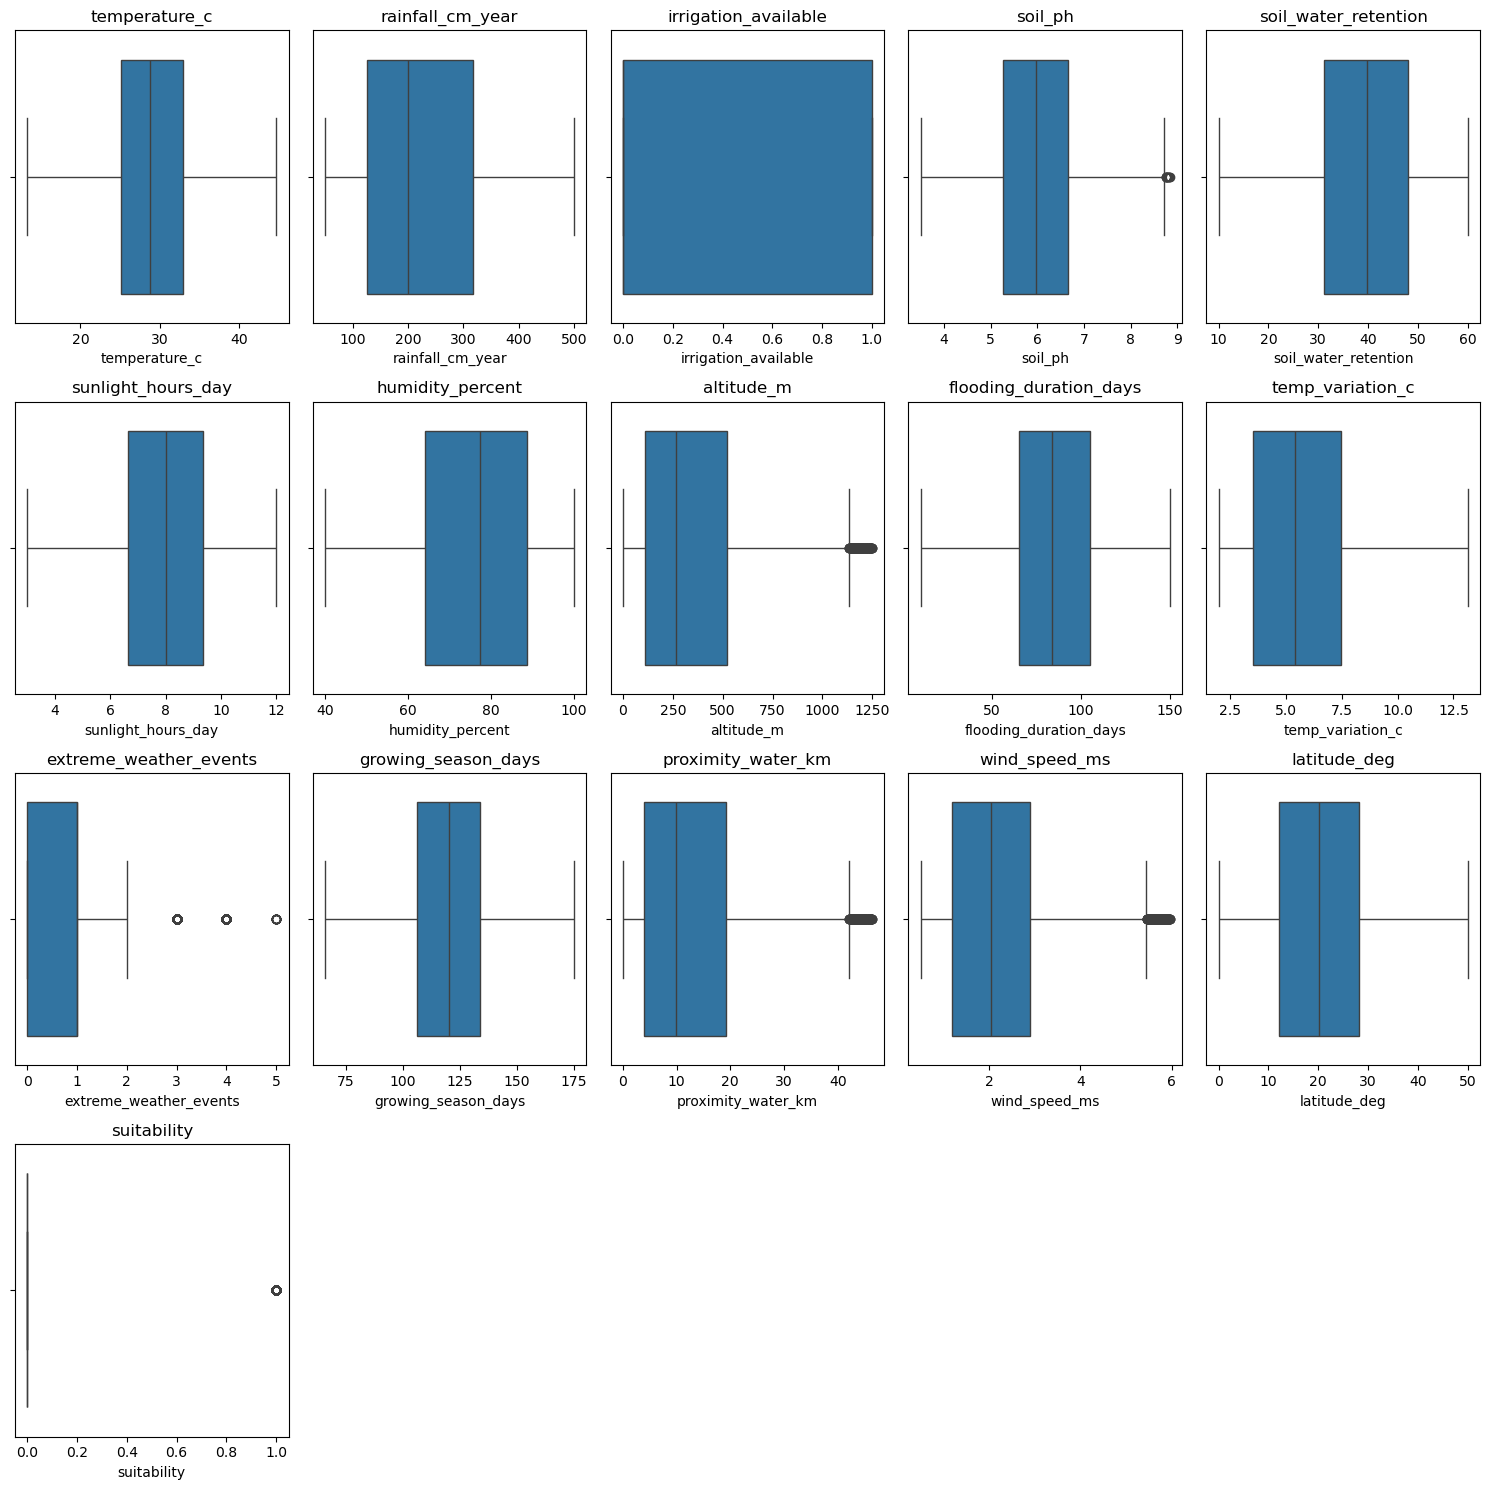

In [12]:
# Remove outliers using IQR method
def remove_outliers_iqr(df):
    numerical_columns = df.select_dtypes(include='number').columns
    # Remove the target variable from the list of numerical columns
    target_variable = 'suitability'  # Replace with your actual target variable name
    if target_variable in numerical_columns:
        numerical_columns = numerical_columns[numerical_columns != target_variable]
    # Calculate IQR and remove outliers
    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

df_no_outliers = remove_outliers_iqr(df)
plot_boxplot(df_no_outliers)

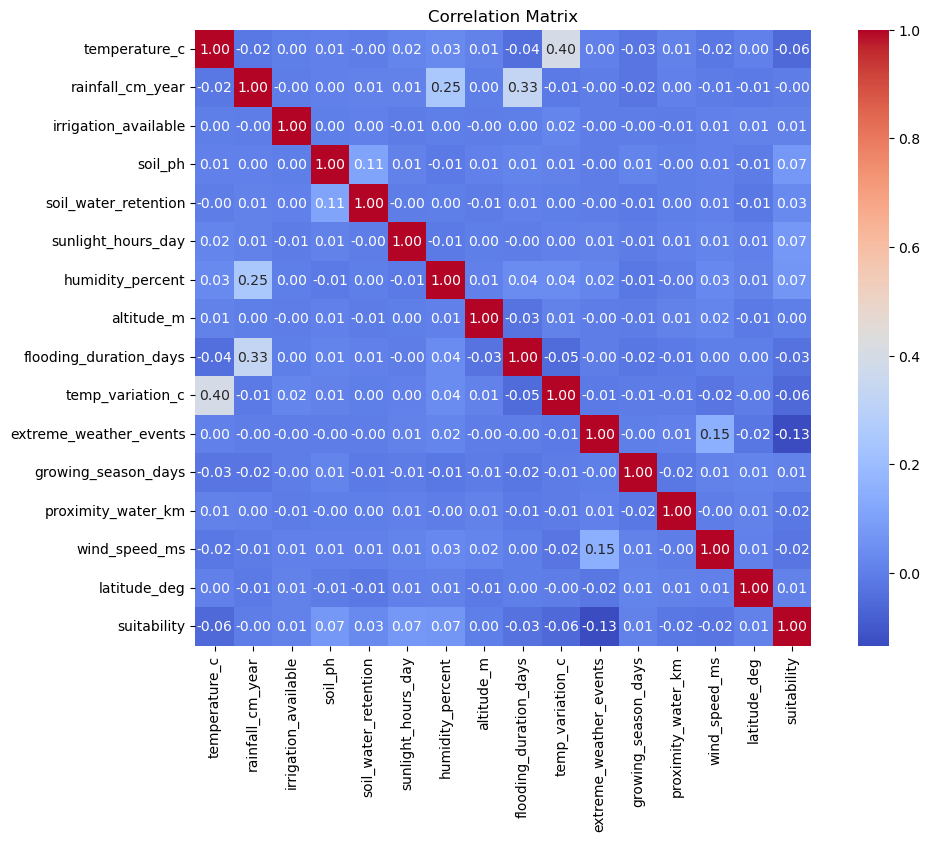

In [13]:
# Check for multicollinearity
def plot_correlation_matrix(df):
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.corr(numeric_only=True)
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Matrix')
    plt.show()
plot_correlation_matrix(df_no_outliers)

In [14]:
# Check for class imbalance
df_no_outliers['suitability'].value_counts()

suitability
0    7523
1     627
Name: count, dtype: int64

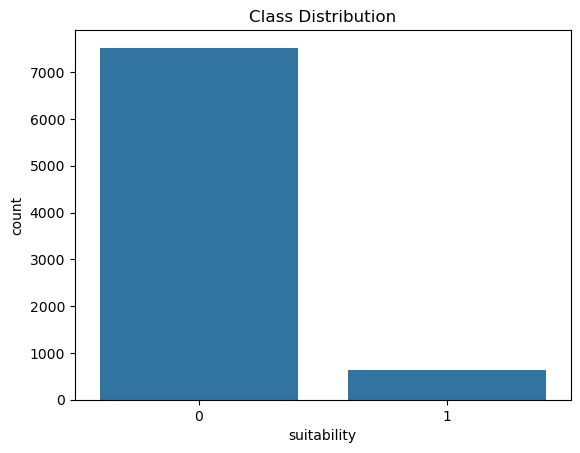

In [15]:
# Plot class distribution
def plot_class_distribution(df):
    target_column = 'suitability'  # Replace with your target column name
    sns.countplot(x=df[target_column])
    plt.title('Class Distribution')
    plt.show()
plot_class_distribution(df_no_outliers)

In [16]:
numerical_columns = df_no_outliers.select_dtypes(include='number').columns
categorical_columns = df_no_outliers.select_dtypes(include='object').columns
print("Number of numerical columns:", len(numerical_columns))
print("Numerical columns:", numerical_columns)
print("Number of categorical columns:", len(categorical_columns))
print("Categorical columns:", categorical_columns)

Number of numerical columns: 16
Numerical columns: Index(['temperature_c', 'rainfall_cm_year', 'irrigation_available', 'soil_ph',
       'soil_water_retention', 'sunlight_hours_day', 'humidity_percent',
       'altitude_m', 'flooding_duration_days', 'temp_variation_c',
       'extreme_weather_events', 'growing_season_days', 'proximity_water_km',
       'wind_speed_ms', 'latitude_deg', 'suitability'],
      dtype='object')
Number of categorical columns: 6
Categorical columns: Index(['soil_type', 'topography', 'soil_nutrient_level', 'drainage_capacity',
       'pest_pressure', 'harsh_condition_type'],
      dtype='object')


In [17]:
# Encode categorical variables using LabelEncoder
def encode_categorical_variables(df):
    categorical_columns = df.select_dtypes(include='object').columns
    for column in categorical_columns:
        df[column] = df[column].astype('category').cat.codes
    print("Categorical variables encoded successfully.")
    return df
df_encoded = encode_categorical_variables(df_no_outliers)

Categorical variables encoded successfully.


In [18]:
df_encoded

,temperature_c,rainfall_cm_year,irrigation_available,soil_type,soil_ph,soil_water_retention,topography,sunlight_hours_day,humidity_percent,altitude_m,...,drainage_capacity,temp_variation_c,extreme_weather_events,growing_season_days,proximity_water_km,wind_speed_ms,pest_pressure,latitude_deg,harsh_condition_type,suitability
0,30.481031,150.598655,0,1,4.873098,48.567102,1,6.048938,73.153718,111.415987,...,1,8.116657,0,102.880964,29.301963,1.249880,2,33.040392,-1,0
2,31.582926,444.429436,1,2,7.182240,50.761314,1,7.142419,90.370295,408.581527,...,1,3.983688,0,124.734253,4.822809,1.366953,0,17.586505,3,0
4,26.501618,356.424201,1,3,4.815601,27.903979,1,6.344502,79.246854,1149.817341,...,2,5.000565,0,121.572181,26.601504,0.995736,2,2.366928,-1,0
5,26.880877,147.170049,0,2,7.198484,33.085993,0,3.051970,56.264218,251.594852,...,2,2.000000,1,108.295036,6.688000,1.520985,2,4.393647,-1,0
6,35.677121,336.027047,0,0,6.515034,38.538673,2,5.832864,93.952947,149.455725,...,0,3.312622,0,109.263104,16.739124,1.498703,1,17.147131,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,33.733338,328.798704,0,6,4.226980,36.989750,3,8.490244,79.303694,492.394303,...,2,10.557414,1,120.248742,22.933469,1.174425,0,21.639146,-1,0
9996,17.546638,396.275138,1,1,8.068061,44.097724,0,10.191451,91.731560,14.021144,...,1,6.312552,1,117.437316,10.253591,2.935095,1,42.151239,-1,0
9997,24.480828,68.874626,1,6,7.143841,30.734309,2,5.166583,53.390718,447.398059,...,0,3.283855,1,129.925807,0.139291,1.194903,0,20.837995,0,0
9998,30.845798,474.731375,1,5,7.107376,46.175202,1,9.753684,59.489951,60.636294,...,0,8.132042,1,147.821338,8.299439,2.689227,2,24.338101,-1,0


In [19]:
# Separate features and target
X = df_encoded.drop('suitability', axis=1)
y = df_encoded['suitability']

print("Shape of Features:", X.shape)
print("Shape of Target:", y.shape)

Shape of Features: (8150, 21)
Shape of Target: (8150,)


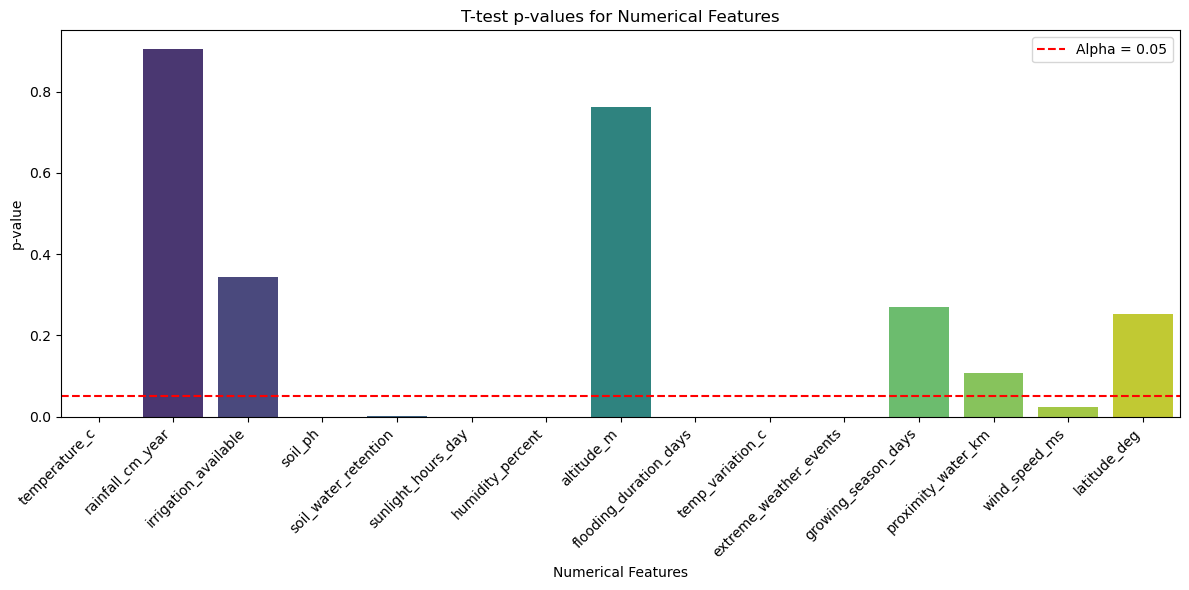

Selected numerical features (p-value < 0.05):
['temperature_c', 'soil_ph', 'soil_water_retention', 'sunlight_hours_day', 'humidity_percent', 'flooding_duration_days', 'temp_variation_c', 'extreme_weather_events', 'wind_speed_ms']


In [20]:
# Separate target from raw data (assuming 'suitability' is the target column)
X_num = df_no_outliers[numerical_columns].drop('suitability', axis=1)

# Function to perform t-test for numerical features
def ttest_feature_selection(X, y, features, alpha=0.05):
    p_values = {}
    for col in features:
        group0 = X.loc[y == 0, col]
        group1 = X.loc[y == 1, col]
        t_stat, p_val = ttest_ind(group0, group1, equal_var=False, nan_policy='omit')
        p_values[col] = p_val
    
    # Visualization: p-values barplot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(p_values.keys()), y=list(p_values.values()), palette="viridis")
    plt.axhline(y=alpha, color='r', linestyle='--', label=f'Alpha = {alpha}')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Numerical Features')
    plt.ylabel('p-value')
    plt.title('T-test p-values for Numerical Features')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    selected_features = [col for col, p in p_values.items() if p < alpha]
    print("Selected numerical features (p-value < {}):".format(alpha))
    print(selected_features)
    return p_values, selected_features

# Exclude the target column from numerical features for t-test
numerical_features_to_test = [col for col in numerical_columns if col != 'suitability']
ttest_p_values, ttest_selected_features = ttest_feature_selection(X, y, numerical_features_to_test, alpha=0.05)

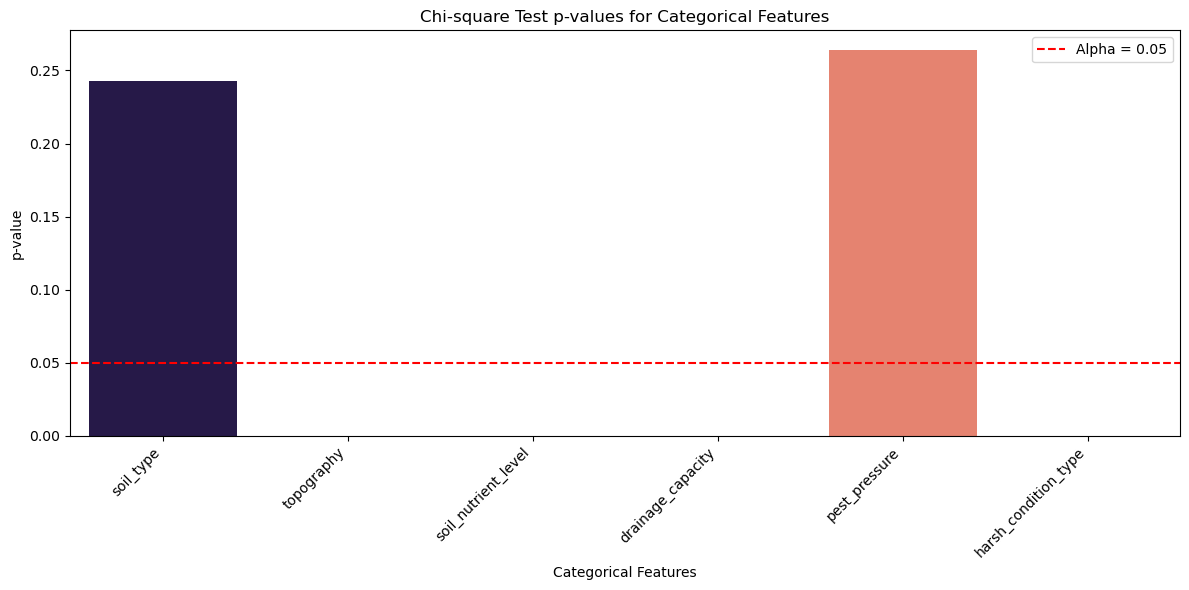

Selected categorical features (p-value < 0.05):
['topography', 'soil_nutrient_level', 'drainage_capacity', 'harsh_condition_type']


In [21]:
# For categorical features, use the raw data as-is
X_cat = df_no_outliers[categorical_columns]

def chi2_feature_selection(X_cat, y, features, alpha=0.05):
    p_values = {}
    for col in features:
        # Create a contingency table between the feature and the target
        contingency = pd.crosstab(X_cat[col], y)
        chi2, p_val, dof, expected = chi2_contingency(contingency)
        p_values[col] = p_val

    # Visualization: p-values barplot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(p_values.keys()), y=list(p_values.values()), palette="magma")
    plt.axhline(y=alpha, color='r', linestyle='--', label=f'Alpha = {alpha}')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Categorical Features')
    plt.ylabel('p-value')
    plt.title('Chi-square Test p-values for Categorical Features')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    selected_features = [col for col, p in p_values.items() if p < alpha]
    print("Selected categorical features (p-value < {}):".format(alpha))
    print(selected_features)
    return p_values, selected_features

chi2_p_values, chi2_selected_features = chi2_feature_selection(X_cat, y, list(categorical_columns), alpha=0.05)

In [22]:
# merge selected features from both tests
selected_features = ttest_selected_features + chi2_selected_features
print("Number of Final selected features:", len(selected_features))
print("Final selected features:")
print(selected_features)

Number of Final selected features: 13
Final selected features:
['temperature_c', 'soil_ph', 'soil_water_retention', 'sunlight_hours_day', 'humidity_percent', 'flooding_duration_days', 'temp_variation_c', 'extreme_weather_events', 'wind_speed_ms', 'topography', 'soil_nutrient_level', 'drainage_capacity', 'harsh_condition_type']


In [23]:
# Create a new DataFrame with selected features
X_selected = X[selected_features]

In [24]:
# Upsample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)
# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

Class distribution after SMOTE:
suitability
0    7523
1    7523
Name: count, dtype: int64


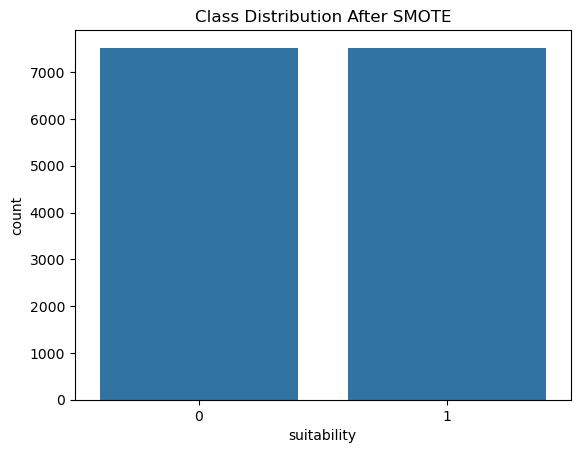

In [25]:
# Visualize the class distribution after SMOTE
def plot_class_distribution_after_smote(y_resampled):
    sns.countplot(x=y_resampled)
    plt.title('Class Distribution After SMOTE')
    plt.show()
plot_class_distribution_after_smote(y_resampled)

In [26]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Split the data in train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Shape of Training Data:", X_train.shape)
print("Shape of Testing Data:", X_test.shape)

Shape of Training Data: (6520, 13)
Shape of Testing Data: (1630, 13)


In [27]:
# Define a dictionary of models to train
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(verbose=-1)
}

results = []  # List to store performance metrics for each model

# Train each model and evaluate its performance
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Use predict_proba to calculate ROC AUC if available
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    # Print performance metrics
    print(f"Model: {name}")
    print(f"  Accuracy : {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall   : {recall:.4f}")
    print(f"  F1 Score : {f1:.4f}")
    if not np.isnan(roc_auc):
        print(f"  ROC AUC  : {roc_auc:.4f}")
    else:
        print("  ROC AUC  : Not available")
    print("-" * 40)

    # Append results to list
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

# Store the results in a dataframe and print
results_df = pd.DataFrame(results)
print("Summary of model performance:")
print(results_df)

Model: Logistic Regression
  Accuracy : 0.9313
  Precision: 0.2500
  Recall   : 0.0091
  F1 Score : 0.0175
  ROC AUC  : 0.8920
----------------------------------------
Model: SVM
  Accuracy : 0.9472
  Precision: 0.8158
  Recall   : 0.2818
  F1 Score : 0.4189
  ROC AUC  : 0.9848
----------------------------------------
Model: KNN
  Accuracy : 0.9344
  Precision: 0.5155
  Recall   : 0.4545
  F1 Score : 0.4831
  ROC AUC  : 0.9175
----------------------------------------
Model: Random Forest
  Accuracy : 0.9926
  Precision: 0.9455
  Recall   : 0.9455
  F1 Score : 0.9455
  ROC AUC  : 0.9968
----------------------------------------
Model: Gradient Boosting
  Accuracy : 0.9957
  Precision: 0.9402
  Recall   : 1.0000
  F1 Score : 0.9692
  ROC AUC  : 0.9976
----------------------------------------
Model: XGBoost
  Accuracy : 0.9951
  Precision: 0.9474
  Recall   : 0.9818
  F1 Score : 0.9643
  ROC AUC  : 0.9978
----------------------------------------
Model: LightGBM
  Accuracy : 0.9957
  Precis

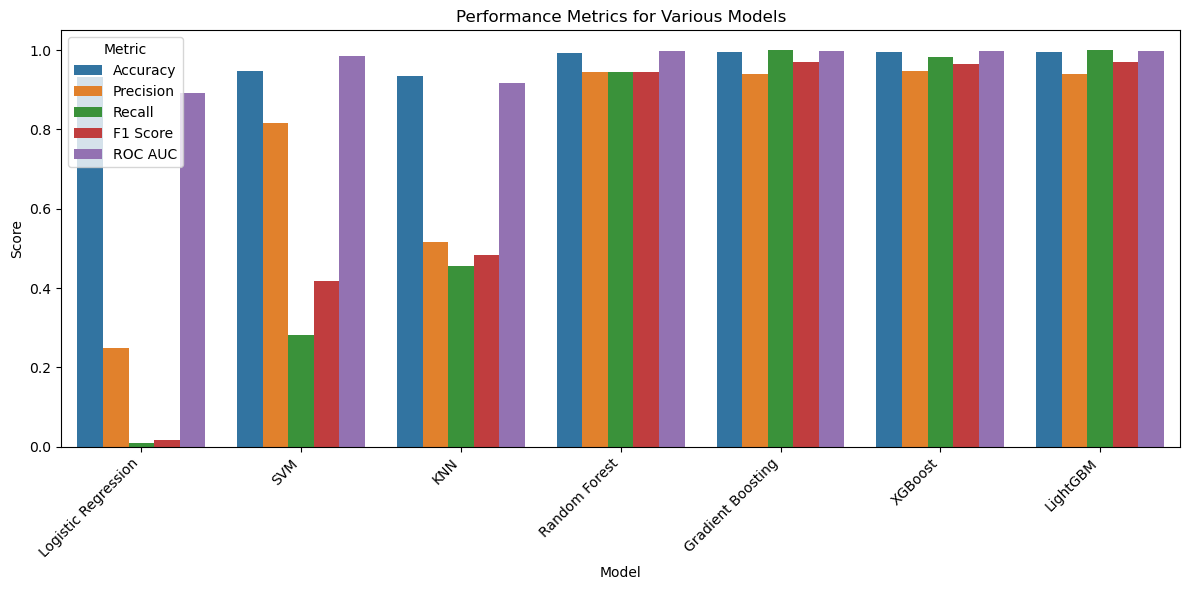

In [28]:
# Plot the performance metrics
# Melt the results_df so that each row represents a metric score for a given model
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 6))
sns.barplot(data=results_melted, x='Model', y='Score', hue='Metric')
plt.title("Performance Metrics for Various Models")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [29]:
# Hyperparameter tuning for all models
# Define the hyperparameter grid for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'SVM': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'XGBoost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'LightGBM': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'num_leaves': [31, 63]
    }
}
# Initialize a dictionary to store the best models and their scores
best_models = {}
# Iterate through each model and perform hyperparameter tuning
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    param_grid = param_grids[name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Get the best model and its score
    best_model = grid_search.best_estimator_
    best_score = grid_search.best_score_
    
    # Store the best model and its score
    best_models[name] = {
        'model': best_model,
        'score': best_score
    }
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best F1 Score for {name}: {best_score:.4f}")
    print("-" * 40)
# Print the best models and their scores
print("\n\nBest models and their scores:")
for name, info in best_models.items():
    print(f"{name}: Best F1 Score = {info['score']:.4f}")
    print(f"Best Parameters: {info['model'].get_params()}")
    print("-" * 40)

Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1 Score for Logistic Regression: 0.0529
----------------------------------------
Tuning hyperparameters for SVM...
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best F1 Score for SVM: 0.8377
----------------------------------------
Tuning hyperparameters for KNN...
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best F1 Score for KNN: 0.6342
----------------------------------------
Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score for Random Forest: 0.9480
----------------------------------------
Tuning hyperparameters for Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best F1 Score for Gradient 

/home/iot/anaconda3/envs/sajid/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:41:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/iot/anaconda3/envs/sajid/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:41:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/iot/anaconda3/envs/sajid/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:41:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/iot/anaconda3/envs/sajid/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:41:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/iot/anaconda3/envs/sajid/lib/python3.12/site-packages/xgboost/core

Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best F1 Score for XGBoost: 0.9731
----------------------------------------
Tuning hyperparameters for LightGBM...
Best parameters for LightGBM: {'learning_rate': 0.1, 'n_estimators': 50, 'num_leaves': 31}
Best F1 Score for LightGBM: 0.9781
----------------------------------------


Best models and their scores:
Logistic Regression: Best F1 Score = 0.0529
Best Parameters: {'C': 10, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
----------------------------------------
SVM: Best F1 Score = 0.8377
Best Parameters: {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rb

In [30]:
# Evaluate the best model on the test set and store the results in dataframe
best_model_results = []
for name, info in best_models.items():
    model = info['model']
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    # Append results to list
    best_model_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })
# Store the results in a dataframe and print
best_model_results_df = pd.DataFrame(best_model_results)
print("Summary of best model performance:")
print(best_model_results_df)


Summary of best model performance:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.930675   0.200000  0.009091  0.017391  0.892010
1                  SVM  0.969939   0.756303  0.818182  0.786026  0.991848
2                  KNN  0.951534   0.647619  0.618182  0.632558  0.967123
3        Random Forest  0.992025   0.936937  0.945455  0.941176  0.997380
4    Gradient Boosting  0.995706   0.940171  1.000000  0.969163  0.996740
5              XGBoost  0.995706   0.940171  1.000000  0.969163  0.997066
6             LightGBM  0.995092   0.939655  0.990909  0.964602  0.997673


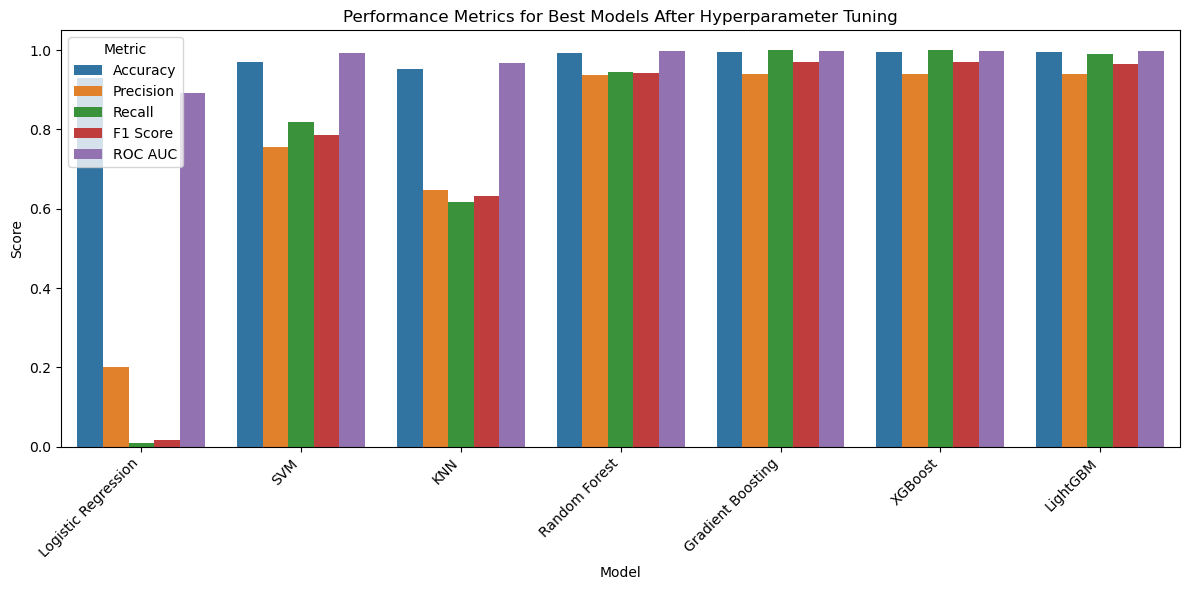

In [31]:
# Plot the best models and their scores after hyperparameter tuning
plt.figure(figsize=(12, 6))
best_model_results_melted = best_model_results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(data=best_model_results_melted, x='Model', y='Score', hue='Metric')
plt.title("Performance Metrics for Best Models After Hyperparameter Tuning")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
# Finalize the best model
best_model_name = max(best_models, key=lambda x: best_models[x]['score'])
best_model = best_models[best_model_name]['model']
print(f"Final best model: {best_model_name}")

Final best model: Gradient Boosting


In [33]:
# Create a Stacking Classifier with the best models
base_models = [
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('LightGBM', LGBMClassifier(verbose=-1))
]
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(),
    cv=5
)
# Train the stacking model
stacking_model.fit(X_train, y_train)
# Evaluate the stacking model on the test set
y_pred_stacking = stacking_model.predict(X_test)
y_proba_stacking = stacking_model.predict_proba(X_test)[:, 1] if hasattr(stacking_model, "predict_proba") else None
# Calculate performance metrics for the stacking model
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking, zero_division=0)
recall_stacking = recall_score(y_test, y_pred_stacking, zero_division=0)
f1_stacking = f1_score(y_test, y_pred_stacking, zero_division=0)
roc_auc_stacking = roc_auc_score(y_test, y_proba_stacking) if y_proba_stacking is not None else np.nan
# Print performance metrics for the stacking model
print(f"Stacking Model:")
print(f"  Accuracy : {accuracy_stacking:.4f}")
print(f"  Precision: {precision_stacking:.4f}")
print(f"  Recall   : {recall_stacking:.4f}")
print(f"  F1 Score : {f1_stacking:.4f}")
if not np.isnan(roc_auc_stacking):
    print(f"  ROC AUC  : {roc_auc_stacking:.4f}")
else:
    print("  ROC AUC  : Not available")
print("-" * 40)

Stacking Model:
  Accuracy : 0.9963
  Precision: 0.9483
  Recall   : 1.0000
  F1 Score : 0.9735
  ROC AUC  : 0.9972
----------------------------------------
